In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis

In [4]:
df=pd.read_csv('Company_Data.csv')

In [5]:
df.shape

(400, 11)

In [6]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

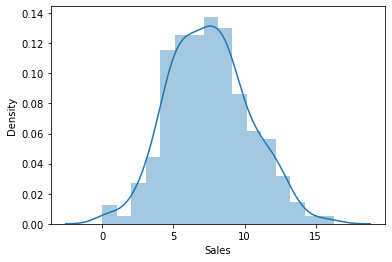

In [7]:
sns.distplot(df.Sales)

In [8]:
def sales(i) :
    if i <= 5 :
        i='Low'
    elif i>5 and i <=10:
        i='Medium'
    else:
        i='High'
    return i

In [9]:
df['Sales']=df['Sales'].apply(sales)

In [10]:
df['Sales'].value_counts()

Medium    245
High       78
Low        77
Name: Sales, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [12]:
df.dtypes

Sales          object
CompPrice       int64
Income          int64
Advertising     int64
Population      int64
Price           int64
ShelveLoc      object
Age             int64
Education       int64
Urban          object
US             object
dtype: object

In [13]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [14]:
print('US')
print(df.US.value_counts())
print('-----------------------------------------')
print('Urban')
print(df.Urban.value_counts())
print('-----------------------------------------')
print('ShelveLoc')
print(df.ShelveLoc.value_counts())
print('-----------------------------------------')
print('Sales')
print(df['Sales'].value_counts())

US
Yes    258
No     142
Name: US, dtype: int64
-----------------------------------------
Urban
Yes    282
No     118
Name: Urban, dtype: int64
-----------------------------------------
ShelveLoc
Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
-----------------------------------------
Sales
Medium    245
High       78
Low        77
Name: Sales, dtype: int64


In [15]:
print('US')
print(df.groupby('US')['Sales'].value_counts())
print('-----------------------------------------')
print('Urban')
print(df.groupby('Urban')['Sales'].value_counts())
print('-----------------------------------------')
print('ShelveLoc')
print(df.groupby('ShelveLoc')['Sales'].value_counts())
print('-----------------------------------------')

US
US   Sales 
No   Medium     96
     Low        32
     High       14
Yes  Medium    149
     High       64
     Low        45
Name: Sales, dtype: int64
-----------------------------------------
Urban
Urban  Sales 
No     Medium     74
       High       22
       Low        22
Yes    Medium    171
       High       56
       Low        55
Name: Sales, dtype: int64
-----------------------------------------
ShelveLoc
ShelveLoc  Sales 
Bad        Medium     51
           Low        41
           High        4
Good       High       46
           Medium     37
           Low         2
Medium     Medium    157
           Low        34
           High       28
Name: Sales, dtype: int64
-----------------------------------------


In [16]:

cat=[i for i in df.columns if df[i].dtype=='object']
print(cat)
num=[i for i in df.columns if df[i].dtype=='int64' or df[i].dtype==  'float64']
print(num)

['Sales', 'ShelveLoc', 'Urban', 'US']
['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


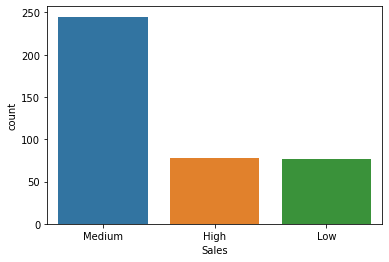

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


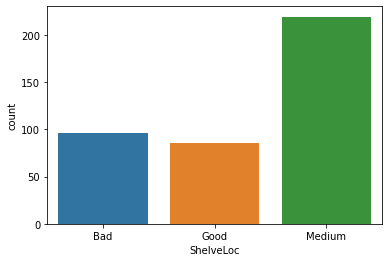

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


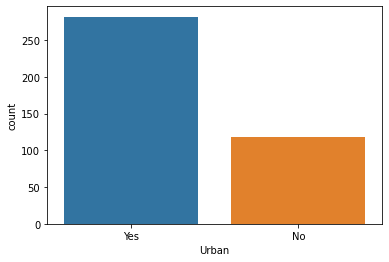

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


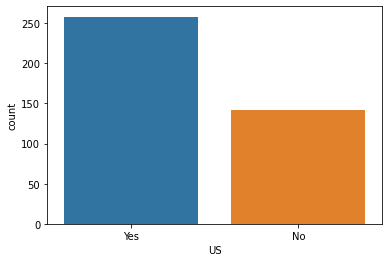

In [17]:
for i in cat:
    sns.countplot(df[i])
    plt.show()

In [18]:
df.describe()

,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


<AxesSubplot:>

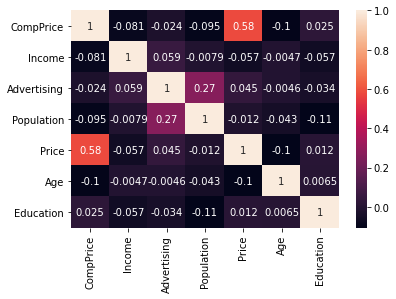

In [19]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in cat:
    df[i]=le.fit_transform(df[i])

__Applied Standard scaler but It haven't produce any change in accuracy of model.__

In [21]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,2,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0


In [22]:
x=df.iloc[:,1:]
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [23]:
y=df.Sales
y

0      2
1      0
2      0
3      2
4      1
      ..
395    0
396    2
397    2
398    2
399    2
Name: Sales, Length: 400, dtype: int32

In [24]:
y.value_counts()

2    245
0     78
1     77
Name: Sales, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

xtrain, xtest , ytrain , ytest = train_test_split(x,y, test_size=0.2,random_state=8)

# Hyperparameter Tuning

In [26]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


In [60]:
train_accuracy = []
test_accuracy = []
res=[]
for max_depth in range(1,20):
    model = RandomForestClassifier(n_estimators=100, max_features=7,max_depth=max_depth)
    results = cross_val_score(model, x , y, cv=kfold)
    res.append(results.mean())
    print(results.mean())
    model.fit(xtrain,ytrain)
    train_accuracy.append(model.score(xtrain, ytrain))
    test_accuracy.append(model.score(xtest, ytest))
    y_pred=model.predict(xtest)
    print('max_depth')
    print(max_depth)
    print('-----------------------------')
    print(pd.crosstab(ytest,y_pred))
    print('****************************')
    print()

0.6024999999999999
max_depth
1
-----------------------------
col_0   2
Sales    
0      20
1       9
2      51
****************************

0.6224999999999999
max_depth
2
-----------------------------
col_0  1   2
Sales       
0      0  20
1      2   7
2      1  50
****************************

0.6399999999999999
max_depth
3
-----------------------------
col_0  0  1   2
Sales          
0      1  0  19
1      0  3   6
2      0  1  50
****************************

0.6575
max_depth
4
-----------------------------
col_0  0  1   2
Sales          
0      2  0  18
1      0  3   6
2      0  2  49
****************************

0.6499999999999999
max_depth
5
-----------------------------
col_0  0  1   2
Sales          
0      4  0  16
1      0  3   6
2      0  2  49
****************************

0.675
max_depth
6
-----------------------------
col_0  0  1   2
Sales          
0      5  0  15
1      0  3   6
2      1  4  46
****************************

0.6900000000000001
max_depth
7
-------------

In [59]:
data = pd.DataFrame({'max_depth':range(1,20),'train_acc':train_accuracy, 'test_acc':test_accuracy,'result':res})
data
#6

,max_depth,train_acc,test_acc,result
0,1,0.606250,0.6375,0.6125
1,2,0.646875,0.6375,0.6225
2,3,0.700000,0.6625,0.6375
3,4,0.787500,0.6625,0.6525
4,5,0.850000,0.6625,0.6625
5,6,0.909375,0.6500,0.6700
6,7,0.943750,0.7375,0.6825
7,8,0.981250,0.7000,0.6975
8,9,1.000000,0.7250,0.6975
9,10,1.000000,0.7500,0.7075


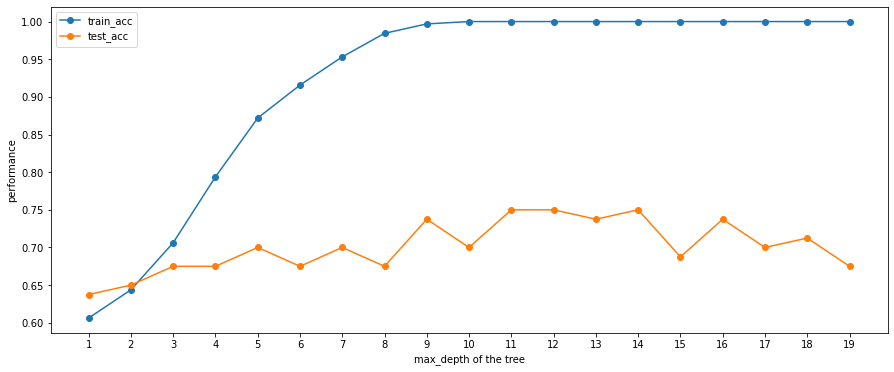

In [62]:
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(data['max_depth'],data['train_acc'], marker = 'o')
plt.plot(data['max_depth'], data['test_acc'], marker = 'o')
ax.set_xticks(np.arange(1,20))
plt.legend(labels)
plt.xlabel('max_depth of the tree')
plt.ylabel('performance')
plt.show()

__Selecting Max_deapth value 10.__

# Final model

In [63]:
clf = RandomForestClassifier(n_estimators=150, max_features=6 ,max_depth=10)
clf.fit(xtrain,ytrain)
pred=clf.predict(xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytrain,clf.predict(xtrain))

1.0

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, pred)

0.725

In [66]:
pd.crosstab(ytest,pred)

col_0,0,1,2
Sales,,,
0,6,0,14
1,0,4,5
2,1,2,48


Text(33.0, 0.5, 'Actual')

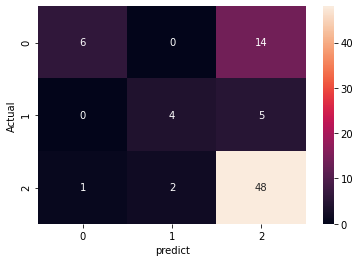

In [67]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(ytest,pred),annot=True)
plt.xlabel('predict')
plt.ylabel('Actual')

In [68]:
# Accuracy 
np.mean(pred==ytest)

0.725